# Lab 7: Implement K-Means 
<hr>

## Introduction

Recall the process of K-Means Clustering method we learned in class:
* Select k centroids randomly or manually. These will be the center point for each segment.
* Assign data points to nearest centroid.
* Reassign centroid value to be the calculated mean value for each cluster.
* Reassign data points to nearest centroid.
* Repeat until data points stay in the same cluster.

In this lab, were are implementing K-means clustering from scratch using python.



## Objectives

You will be able to:

* Fully understand the K-Means clustering algorithm
* Implement your own K-Means from scrach
* review and practice on writing Object-Oriented programs using Python
* Compare your K-Means clustering implementation with the K-Means model in sklearn


## Complete the Following Steps

We will first import the required libraries:

In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math

Define the class K_Means and try it with some random data

[1.97851603 0.57556979]
[1.97851603 0.57556979]
[1.97851603 0.57556979]
[0.09161317 0.55463301]
[1.97851603 0.57556979]
[1.96924845 0.48234536]
[0.09161317 0.55463301]
[1.97851603 0.57556979]
[0.09161317 0.55463301]
[0.09161317 0.55463301]
[0.09161317 0.55463301]
[1.96924845 0.48234536]
[1.96924845 0.48234536]
[1.97851603 0.57556979]
[1.96924845 0.48234536]
[0.09161317 0.55463301]
[1.96924845 0.48234536]
[1.96924845 0.48234536]
[1.89020414 1.43687138]
[1.97851603 0.57556979]
[1.89020414 1.43687138]
[0.09161317 0.55463301]
[1.89020414 1.43687138]
[1.96924845 0.48234536]
[0.53676392 1.52763929]
[1.97851603 0.57556979]
[0.53676392 1.52763929]
[0.09161317 0.55463301]
[0.53676392 1.52763929]
[1.96924845 0.48234536]
[0.84253081 0.21793248]
[1.97851603 0.57556979]
[0.84253081 0.21793248]
[0.09161317 0.55463301]
[0.84253081 0.21793248]
[1.96924845 0.48234536]
[0.270214   1.27374145]
[1.97851603 0.57556979]
[0.270214   1.27374145]
[0.09161317 0.55463301]
[0.270214   1.27374145]
[1.96924845 0.48

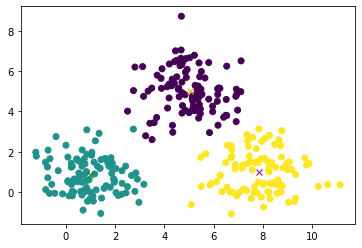

In [5]:
# We define a K_Means class with init consisting default value of k as 2, error tolerance as 0.001 and maximum iteration as 500.
# error tolerance: if (current centroid - previous centroid)/previous centroid  < error tolerance, then stop 

class K_Means:
    
    # The __init__ method in Python is equivalent to C++/JAVA constructor in an object-oriented approach
    # self (required) represents the instance of the class. 
    # By using the "self" keyword we can access the attributes and methods of the class in python.
    def __init__(self, k=2, tolerance = 0.001, max_iter = 500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
        
        
    # Returns the Euclidean distance of two points
    # TO DO (10 points)
    def euclidean_distance(self, point1, point2):
        point1 = np.array(point1)
        point2 = np.array(point2)
        # Subtract each point element-wise, square each element, sum them together, then take sqrt.
        # N-dimensional euclidean distance taken from wikipedia formula https://en.wikipedia.org/wiki/Euclidean_distance#Higher_dimensions
        return np.sqrt(np.sum(np.square(np.subtract(point1, point2))))
    
    # Compute k-means clustering
    # TO DO
    def fit(self, data):
        
        # There are various methods of assigning k-centroid initially. 
        # Mostly used is random selection but lets go with the easiest way (in my opinion).  
        # We assign the first k points from dataset as the initial k centroids.        
        # Note: centroids is a dict of index: centroid
        self.centroids = {}
        
        # TO DO: assign the first k data points as the initial k centroids
        # (5 points)
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        # We can start clustering 
        # repeat at most max_iterations times
        for i in range(self.max_iterations):
            
            # Note clusters is a dict of index: cluster
            self.clusters = {}
            # TO DO: initialize k empty clusters
            # (5 points)
            for j in range(self.k):
                self.clusters[j] = []
            
            # for each point in data, compute the distances to all centroids
            # Then append the point to the cluster with the min distance
            # TO DO (20 points) 
            # Hint: You can achieve this by using nested for loops
            for point in data:
                min_distance = float('inf')
                min_idx = 0
                for j in range(self.k):
                    centroid = self.centroids[j]
                    distance = self.euclidean_distance(point, centroid)
                    if distance < min_distance:
                        min_distance = distance
                        min_idx = j
                
                self.clusters[min_idx].append(point)
                        

            # We need a copy of the current centroids
            # You need to do nothing here
            previous = self.centroids.copy()
            
            # reassign (update) the centroids to be the average of each cluster
            # TO DO (10 points)
            # Hint: You can call np.average to compute the average of a dataset
            for j in range(self.k):
                avg = np.mean(self.clusters[j], axis=0)
                self.centroids[j] = avg         
            
            # Terminate the clustering if it is already optimal   
            # You need to do nothing here
            isOptimal = True
            
            # compare every centroid in self.centroids with its previous centroid (in previous)
            # If for all centroid, the (current - previous)/previous < self.tolerance, then it is optimal and 
            # we can stop (break) the clustering
            # TO DO (10 points)
            
            for j in range(self.k):
                diff = np.subtract(self.centroids[j], previous[j])
                if (np.sum(diff) / np.sum(previous[j])) > self.tolerance:
                    isOptimal = False
                    break
               
            if isOptimal:
                break
                
                
                
    # Returns the index of the closest cluster each point in 'data' belongs to.
    # TO DO (10 points)
    # Hint: You can define an empty list first. Then use nested for loops to compute each index and append the index 
    #       to the list. Finally, return the list.
    def predict(self, data):
        ans = []
        for point in data:
            min_dis = float('inf')
            min_idx = 0
            for j in range(self.k):
                dis = self.euclidean_distance(self.centroids[j], point)
                if dis < min_dis:
                    min_idx = j
                    min_dis = dis
            
            ans.append(min_idx)

        return ans
        
# Hooray! We did it. 
# Now let's test our own K-Means

def main():
    K=3
    center_1 = np.array([1,1])
    center_2 = np.array([5,5])
    center_3 = np.array([8,1])

    # Generate three random datasets and center them to the three centers
    cluster_1 = np.random.randn(100,2) + center_1
    cluster_2 = np.random.randn(100,2) + center_2
    cluster_3 = np.random.randn(100,2) + center_3

    # concatenate the three datasets into one large dataset to test our K-Means
    data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)
    
    # Create a K_Means model object
    k_means = K_Means(K)
    
    
    # TO DO
    # fit the model to 'data' 
    # (5 points)
    k_means.fit(data)
    
    # plot the three centroids using marker = 'x'. You can use a for loop here. 
    # (5 points)
    
    colors = ['orange', 'green', 'purple']

    for i in range(K):
        plt.plot(k_means.centroids[i][0], k_means.centroids[i][1], marker='x', c=colors[i])

    # plot the data in any three different colors
    # Hint: check our in-class notebook. You can call predict, then use it as the value of 'c'
    # (10 points)
    pred = k_means.predict(data)
    plt.scatter(data[:,0], data[:,1], c=pred)
    
if __name__ == "__main__":
    main()
            

## Compare our K-Means with SCIKIT_ LEARN
Unfortunately, we cannot use the 'data' we defined in main(). So let's create three random datasets again.

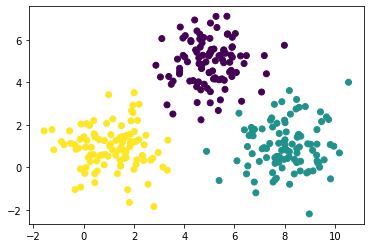

In [21]:
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
cluster_1 = np.random.randn(100,2) + center_1
cluster_2 = np.random.randn(100,2) + center_2
cluster_3 = np.random.randn(100,2) + center_3

data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)

# TO DO
# Use KMeans in sklearn to plot 'data' in three colors
# (10 points)
from sklearn.cluster import KMeans
k = 3

km = KMeans(n_clusters=k)
km.fit(data)

pred=km.predict(data)
plt.scatter(data[:,0], data[:,1], c=pred)